In [6]:
%run /project2/lgrandi/zhut/Initialize_tianyu.ipynb

In [2]:
import strax
import straxen

In [11]:
st = straxen.contexts.demo()
st.select_runs()
run_ids = st.select_runs().name.values

Checking data availability: 100%|██████████| 5/5 [00:00<00:00, 74.02it/s]


array(['180215_1029', '180423_1021'], dtype=object)

In [18]:
run_ids = tuple(run_ids)

In [34]:
peaks = st.get_array(run_ids, 'peak_basics', selection=['area_fraction_top < 0.6'])

Loading 2 runs: 2it [00:00, 85.75it/s]


In [35]:
peaks.dtype.names

('run_id',
 'time',
 'endtime',
 'area',
 'n_channels',
 'max_pmt',
 'max_pmt_area',
 'range_50p_area',
 'area_fraction_top',
 'length',
 'dt')

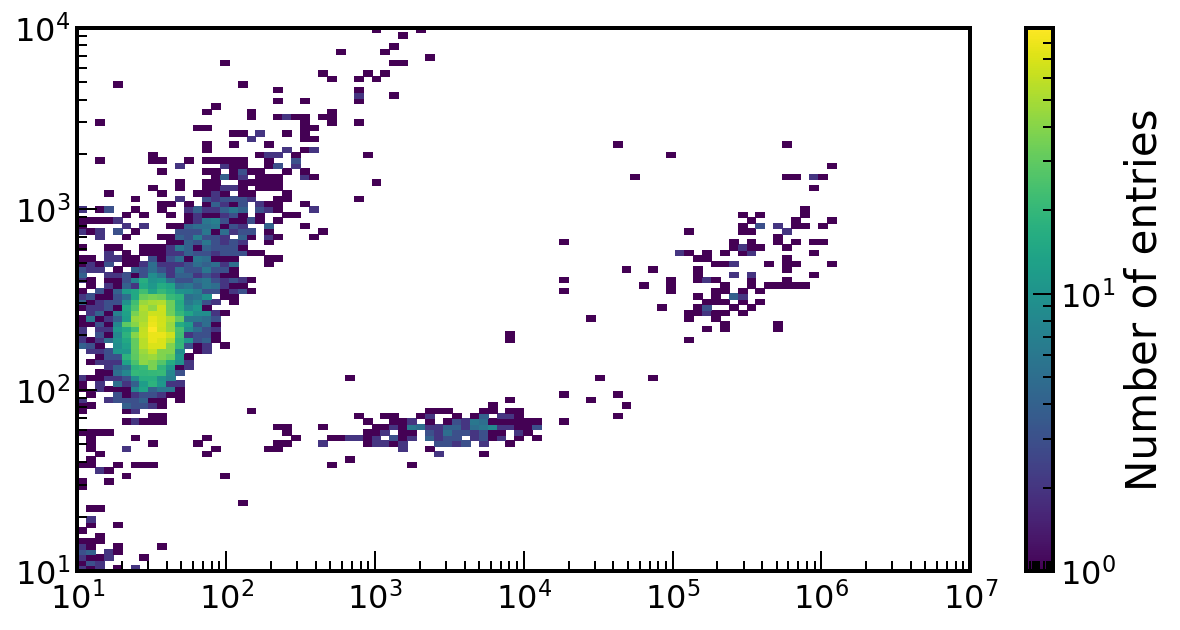

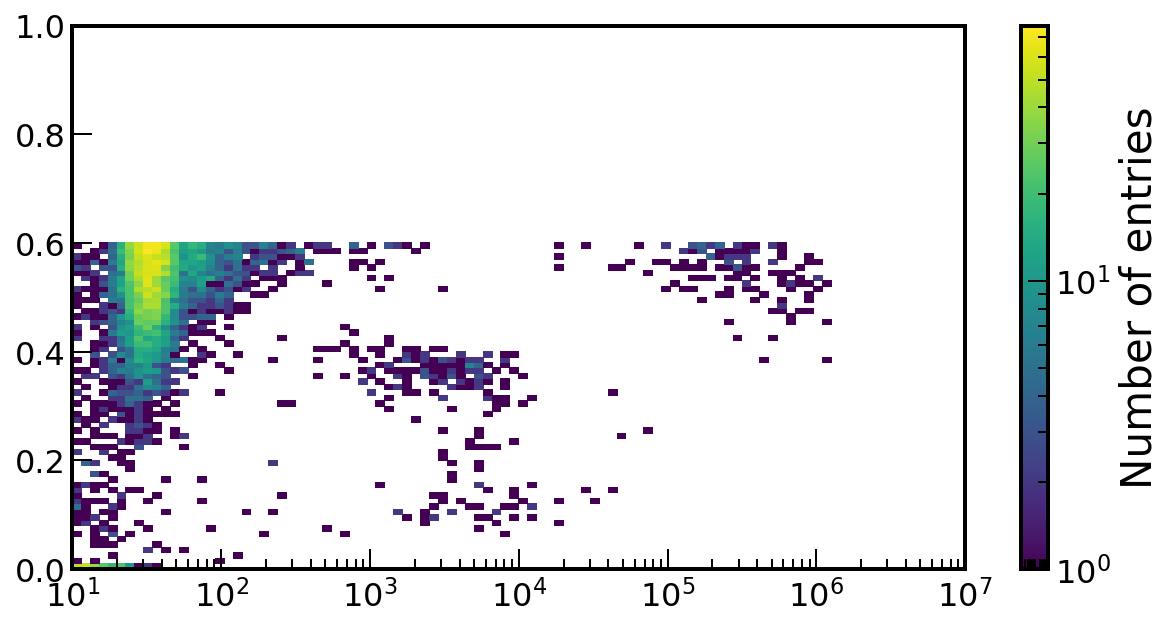

In [40]:
with initiate_plot(10, 5):
    mh = Histdd(peaks['area'], peaks['range_50p_area'],
        bins=[np.logspace(1, 7, 101), np.logspace(1, 4, 101)])
    mh.plot(log_scale='log')
    plt.xscale('log'); plt.yscale('log')

with initiate_plot(10, 5):
    mh = Histdd(peaks['area'], peaks['area_fraction_top'],
        bins=[np.logspace(1, 7, 101), np.linspace(0, 1, 101)])
    mh.plot(log_scale='log')
    plt.xscale('log')

In [183]:
import numpy as np

class AdvancedExpertClassification(strax.Plugin):
    """Everything is an S1!"""

    # Name of the data type this plugin provides
    provides = 'peak_classification'

    # Data types this plugin requires. Note we don't specify
    # what plugins should produce them: maybe the default PeakBasics
    # has been replaced by another AdvancedExpertBlabla plugin?
    depends_on = ('peak_basics',)

    # Numpy datatype of the output 
    dtype = straxen.plugins.plugins.PeakClassification.dtype
    dtype = [
        ('type', np.int8, 'Classification of the peak.')]

    # Version of the plugin. Increment this if you change the algorithm.
    __version__ = '0.1.5'

    def compute(self, peaks):
        result = np.ones(len(peaks))
        result[peaks['range_50p_area'] > 100] = 2
        result[peaks['area'] < 50] = 0

        return dict(type=result.astype(np.int8))

In [186]:
straxen.plugins.plugins.PeakClassification.dtype

[('type', numpy.int8, 'Classification of the peak.'),
 ('type_alt', numpy.int8, 'Alt Classification of the peak.')]

In [187]:
peaks = st.get_array(run_ids, ('peak_basics', 'peak_classification'),
               register=AdvancedExpertClassification)

Loading 2 runs: 2it [00:00, 40.34it/s]


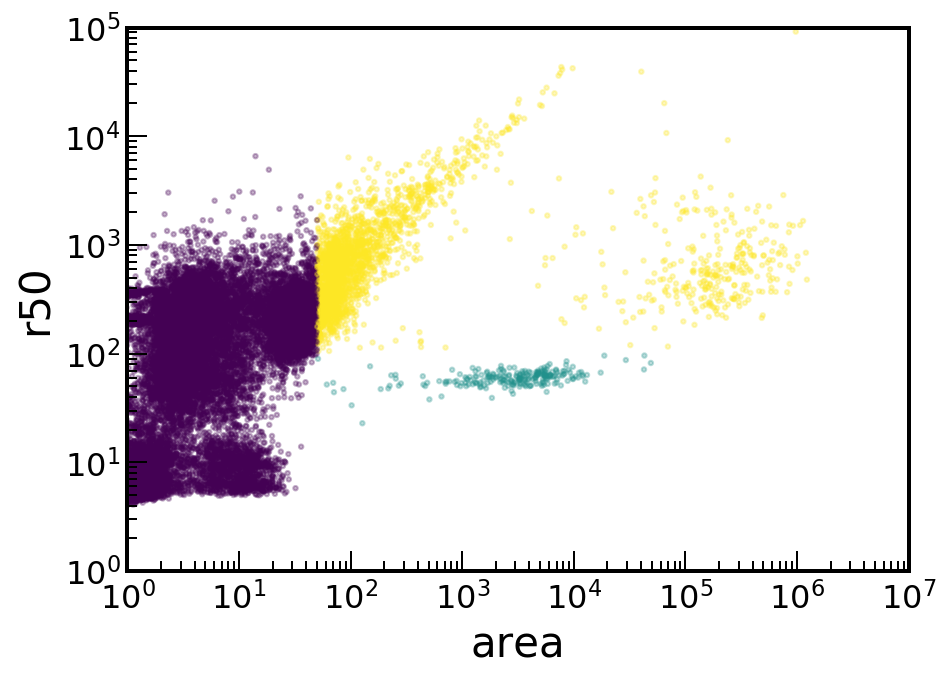

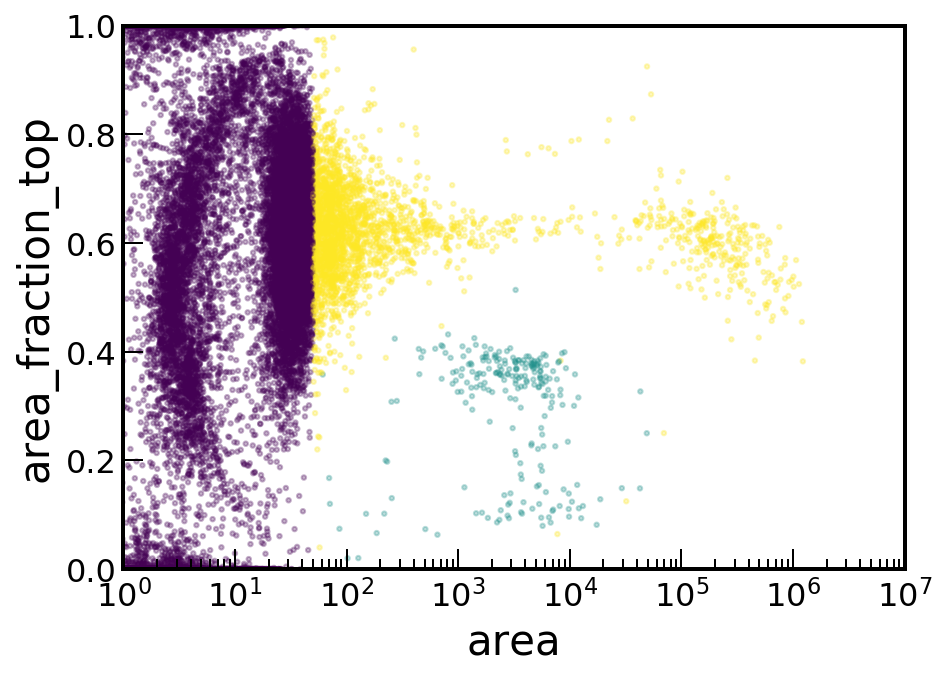

In [189]:
with initiate_plot(7, 5):
    plt.scatter(peaks['area'], peaks['range_50p_area'], s=5, alpha=0.3, c=peaks['type'])
    plt.xscale('log'); plt.yscale('log')
    plt_config(xlim=[1, 1e7], ylim=[1, 1e5], xlabel='area', ylabel='r50')

with initiate_plot(7, 5):
    plt.scatter(peaks['area'], peaks['area_fraction_top'], s=5, alpha=0.3, c=peaks['type'])
    plt.xscale('log')
    plt_config(xlim=[1, 1e7], ylim=[0, 1], xlabel='area', ylabel='area_fraction_top')

In [208]:
dfe = st.get_df(run_ids, ('event_basics', 'event_info'),
               register=AdvancedExpertClassification)

Loading 2 runs: 2it [00:00, 15.69it/s]


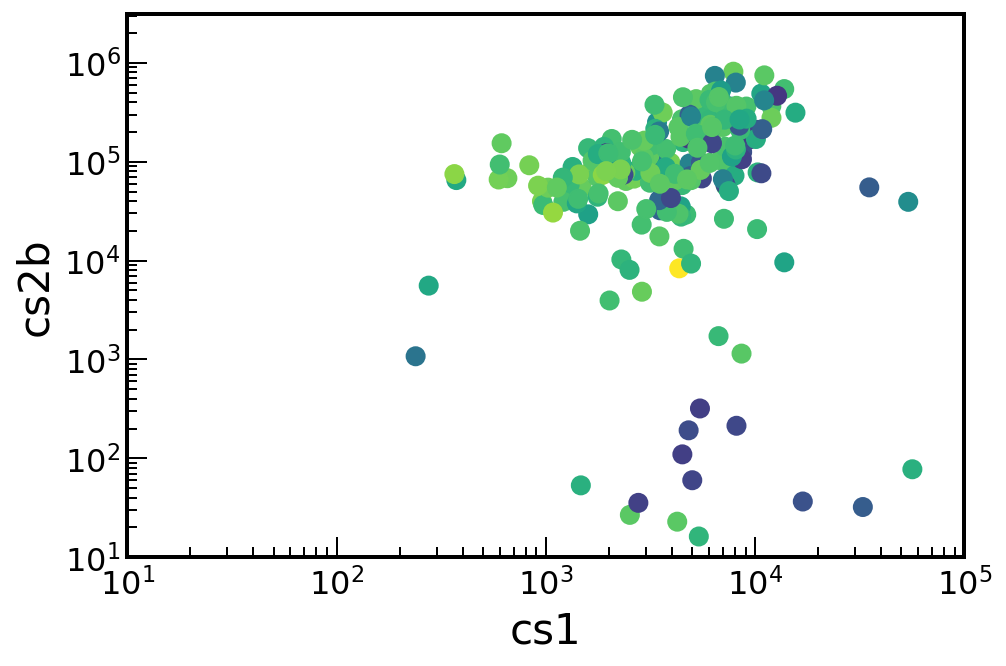

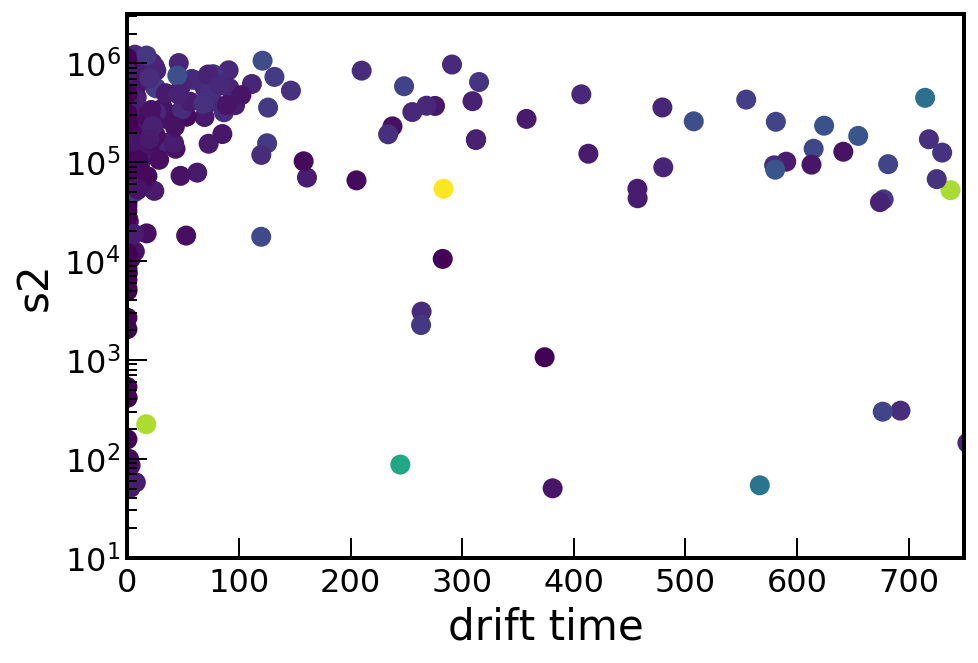

In [215]:
with initiate_plot(7.5, 5):
    plt.scatter(dfe['cs1'], dfe['cs2'] * (1 - dfe['s2_area_fraction_top']),
        c=dfe['s1_area_fraction_top'])
    plt.xscale('log'); plt.yscale('log')
    plt_config(xlim=[1e1, 1e5], ylim=[1e1, 10**6.5], xlabel='cs1', ylabel='cs2b')
    
with initiate_plot(7.5, 5):
    plt.scatter(dfe['drift_time']/1e3, dfe['s2_area'],
        c=dfe['s1_area'])
    plt.yscale('log')
    plt_config(xlim=[0, 750], ylim=[1e1, 10**6.5], xlabel='drift time', ylabel='s2')